In [1]:
import pandas as pd
import numpy as np
import shared
import json


In [2]:
ve_or_ju = "ju"

In [3]:
runs_df = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [4]:
country_counts = runs_df["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 50]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'DEN',
 'GER',
 'FRA',
 'ESP',
 'CZE',
 'POL',
 'ITA',
 'USA',
 'UKR',
 'HUN']

In [5]:
runs_df["first_name"] = runs_df.name.str.split(" ", expand=True).iloc[:, 0]
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()
display(top_first_names)

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'johan',
 'anders',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'jouko',
 'petteri',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'niko',
 'samuli',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'peter',
 'joni',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'reijo',
 'daniel',
 'martti',
 'kai',
 'jarno',
 'panu',
 'raimo',
 'thomas',
 'stefan',
 'keijo',
 'per',
 'magnus',
 'simon',
 'pentti',
 'sak

In [6]:
# Temporarily remove 2018 in order to try predict it in other notebook
runs_df = runs_df[runs_df.year != 2018]
runs_df

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
1,joni hirvikallio,2017,16,KOOVEE,FIN,5.762,1,6,joni
2,joni hirvikallio,2016,143,KOOVEE,FIN,6.251,6,6,joni
3,joni hirvikallio,2015,12,KOOVEE,FIN,5.843,5,6,joni
4,joni hirvikallio,2013,37,KOOVEE,FIN,5.796,1,6,joni
6,topi anjala,2017,1,KOOVEE,FIN,5.621,1,7,topi
7,topi anjala,2016,9,KOOVEE,FIN,6.100,1,7,topi
8,topi anjala,2015,12,KOOVEE,FIN,5.977,1,7,topi
9,topi anjala,2014,21,KOOVEE,FIN,7.164,2,7,topi
10,topi anjala,2013,37,KOOVEE,FIN,5.642,7,7,topi
11,topi anjala,2012,48,KOOVEE,FIN,5.974,3,7,topi


In [7]:
features = shared.preprocess_features(runs_df, top_countries, top_first_names)
features.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 1 to 76530
Data columns (total 9 columns):
name            64184 non-null object
year            64184 non-null int64
team_id         64184 non-null int64
team            64184 non-null object
team_country    63349 non-null object
pace            64184 non-null float64
leg_nro         64184 non-null int64
num_runs        64184 non-null int64
first_name      64184 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


None

,team_id,leg_1,leg_2,leg_3,leg_4,leg_5,leg_6,leg_7,c_CZE,c_DEN,...,fn_visa,fn_vladimir,fn_väinö,fn_william,fn_yrjö,fn_öystein,fn_öyvind,team_id_log10,team_id_log100,team_id_square
1,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.204120,0.602060,256
2,143,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.155336,1.077668,20449
3,12,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1.079181,0.539591,144
4,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.568202,0.784101,1369
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,1
7,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.954243,0.477121,81
8,12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.079181,0.539591,144
9,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.322219,0.661110,441
10,37,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1.568202,0.784101,1369
11,48,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.681241,0.840621,2304


In [8]:
features.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 64184 entries, 1 to 76530
Columns: 492 entries, team_id to team_id_square
dtypes: Sparse[float64, nan](2), Sparse[int64, nan](2), Sparse[uint8, 0](488)
memory usage: 6.2 MB


In [9]:
x = features.values
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(64184, 492)

(64184, 1)

In [1]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(51347, 492)

In [12]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [13]:
y_train.shape

(51347, 1)

Shapes: y_test=(12837, 1) y_pred=(12837,)
Mean squared error: 5.345
Explained variance score: 0.391


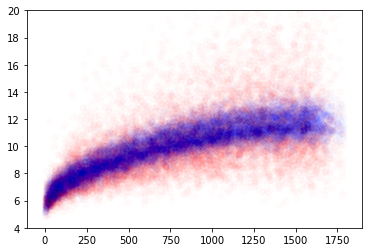

CPU times: user 7.75 s, sys: 807 ms, total: 8.56 s
Wall time: 2.91 s


In [14]:
%%time
linear = linear_model.LinearRegression()
fit_and_test_model(linear, x_train, x_test, y_train, y_test)

In [15]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

,name,coef
0,team_id,4.272078e-04
1,leg_1,-6.928412e-02
2,leg_2,-2.188857e-02
3,leg_3,-2.235520e-02
4,leg_4,4.727084e-02
5,leg_5,7.585181e-02
6,leg_6,2.845195e-02
7,leg_7,-3.804671e-02
8,c_CZE,-1.790961e-01
9,c_DEN,-2.589188e-02


      Iter       Train Loss   Remaining Time 
         1           0.0626          162.25m
         2           0.0581          161.14m
         3           0.0545          160.42m
         4           0.0515          160.10m
         5           0.0489          160.43m
         6           0.0469          160.29m
         7           0.0451          160.56m
         8           0.0437          160.45m
         9           0.0424          160.63m
        10           0.0414          160.60m
        20           0.0367          160.50m
        30           0.0354          157.16m
        40           0.0347          155.25m
        50           0.0344          152.73m
        60           0.0342          149.78m
        70           0.0341          147.83m
        80           0.0339          145.69m
        90           0.0338          147.57m
       100           0.0337          145.36m
       200           0.0332          178.50m
       300           0.0328          174.39m
       40

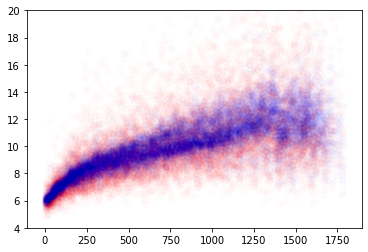

CPU times: user 2h 23min 17s, sys: 10.7 s, total: 2h 23min 28s
Wall time: 2h 23min 54s


In [16]:
%%time
gbr_num_estimators=7100
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)

fit_and_test_model(gbr, x_train, x_test, y_train, y_test)

#print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))

In [17]:
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0567           74.50m
         2           0.0542           74.77m
         3           0.0522           74.66m
         4           0.0506           74.33m
         5           0.0490           74.58m
         6           0.0477           74.65m
         7           0.0466           74.69m
         8           0.0457           74.90m
         9           0.0449           75.13m
        10           0.0442           75.24m
        20           0.0412           74.70m
        30           0.0404           75.19m
        40           0.0400           74.94m
        50           0.0398           74.22m
        60           0.0397           73.35m
        70           0.0396           72.40m
        80           0.0396           71.75m
        90           0.0395           71.00m
       100           0.0395           70.42m
       200           0.0392           66.69m
       300           0.0390           63.97m
       40

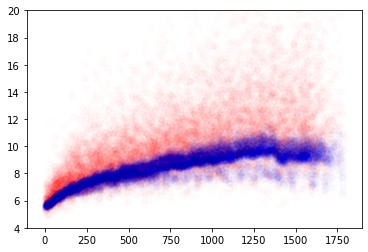

In [18]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0642           81.35m
         2           0.0622           80.78m
         3           0.0604           81.27m
         4           0.0589           81.26m
         5           0.0576           81.09m
         6           0.0564           81.31m
         7           0.0554           81.13m
         8           0.0545           81.27m
         9           0.0537           81.25m
        10           0.0530           81.10m
        20           0.0492           80.19m
        30           0.0478           78.69m
        40           0.0472           77.02m
        50           0.0469           76.20m
        60           0.0467           75.05m
        70           0.0466           73.95m
        80           0.0465           73.11m
        90           0.0464           72.44m
       100           0.0463           71.84m
       200           0.0459           66.47m
       300           0.0457           63.96m
       40

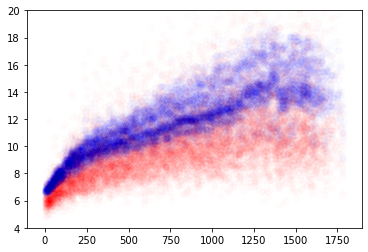

In [19]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)



In [20]:
joblib.dump(gbr, 'gbr.sav')
joblib.dump(gbr_q_low, 'gbr_q_low.sav')
joblib.dump(gbr_q_high, 'gbr_q_high.sav')


['gbr_q_high.sav']

In [21]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [22]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)

# Intentionally don't use log scale for calculation to get bigger std 
gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_q_pred_errors.q_low_error.mean())
display(gbr_q_pred_errors.q_high_error.mean())
display(gbr_q_pred_errors.q_error.mean())
display(gbr_q_pred_errors["std"].mean())
display(gbr_q_pred_errors["std_correct"].mean())
display(gbr_q_pred_errors["abs_error_in_stds"].mean())

,q_low,true,predicted,q_high,q_low_error,q_high_error,q_error,std,std_correct,abs_error,abs_error_in_stds
12822,8.985,9.839,9.695,11.642,False,False,False,1.328,1.138,0.144,0.046
12823,8.530,9.587,9.907,11.153,False,False,False,1.311,1.143,0.320,0.102
12824,6.749,6.736,7.974,8.701,True,False,True,0.976,1.135,1.238,0.398
12825,8.795,8.877,10.368,12.479,False,False,False,1.842,1.191,1.491,0.453
12826,8.926,9.270,10.654,12.781,False,False,False,1.927,1.197,1.384,0.418
12827,8.638,18.745,12.806,15.670,False,True,True,3.516,1.347,5.939,1.544
12828,7.194,7.286,7.679,9.518,False,False,False,1.162,1.150,0.393,0.124
12829,9.217,9.101,9.252,12.919,True,False,True,1.851,1.184,0.151,0.046
12830,8.649,11.466,10.587,12.095,False,False,False,1.723,1.183,0.879,0.269
12831,7.555,9.353,8.826,10.211,False,False,False,1.328,1.163,0.527,0.165


0.1655371192646257

0.16101892965646178

0.32655604892108747

1.7960157078854717

1.1863481870490475

0.46041760384338554

In [27]:
np.exp(1.138)

3.1205210778255728

In [30]:
%%date

UsageError: Cell magic `%%date` not found.


In [24]:
STOP_HERE

NameError: name 'STOP_HERE' is not defined

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])